**EC 414 - Spring 2019**

**HW 4 - QDA/LDA & Logistic Regression 1**

Due:  Wednesday Feb 27 (In class)

**1) Obtaining QDA & LDA Decision Rules: **

In this problem, we will consider Quadratic and Linear Discriminant Analysis for $m$ classes where $y \in \{1,...,m \}$ represents a class index. In class, we looked at the simple 2-class LDA. Using the MPE (Most Probable Explanation) rule: 

$h_{MPE} (\boldsymbol{x})= \text{argmax}_{y} p(y|\boldsymbol{x},\theta)$, 

obtain the QDA & LDA decision rules: 

$h_{QDA} (\boldsymbol{x}) = \text{argmin}_y [\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y) + \frac{1}{2} \text{log} (\text{det}(\Sigma_y)) - \text{log} (p(y))]$,

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y [(\boldsymbol{\mu}_y^T \Sigma^{-1} ) \cdot \boldsymbol{x} - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))]$.

Please show all intermediate steps in your analysis. As a tip, it may be expedient to use Bayes Rule in your analysis along with the fact that, for QDA:

$p(\boldsymbol{x}|y,\theta) = N(\boldsymbol{\mu}_y,\Sigma_y)(\boldsymbol{x}) = \frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}} e^{- \frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y)}$, 

and for LDA:

$ \Sigma_y = \Sigma \text{ } \forall \text{ } y \in \{1,...,m \}$.

Also, assume that $\Sigma$ is symmetric; this allows us to see that: $\boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{x} = \boldsymbol{x}^T \Sigma^{-1} \boldsymbol{\mu}_y$ (this is useful in going from the QDA decision rule to the LDA decision rule).



**2) Implementation of LDA**

In this problem, we will explore the implementation and application of LDA on an artificial dataset. Using any built in Python command/function for LDA in this problem is prohibited.  

a) Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-7,-7]^T, \boldsymbol{\mu}_3 = [-8,-1]^T$,

$\Sigma = [[0.5,0];[0,0.5]]$.

Let each cluster of data have $500$ points. Plot the generated Gaussian data.

<function matplotlib.pyplot.show>

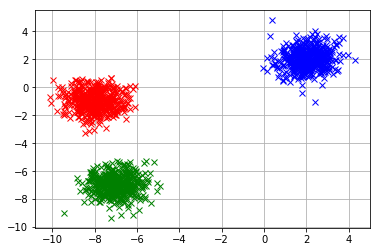

In [349]:
# Write code here:
import numpy as np
import matplotlib.pyplot as plt

m1 = [2,2]
m2 = [-7,-7]
m3 = [-8,-1]
cov = [[0.5, 0], [0, 0.5]]

x1, y1 = np.random.multivariate_normal(m1, cov, 500).T
x2, y2 = np.random.multivariate_normal(m2, cov, 500).T
x3, y3 = np.random.multivariate_normal(m3, cov, 500).T

plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'x', color='green')
plt.plot(x3, y3, 'x', color='red')
plt.grid(axis='both')
plt.show


b) Randomly split all the data and labels into training and testing sets using an $85\%$/$15\%$  train/test split. 

In [350]:
# Write code here:
from sklearn.model_selection import train_test_split

# make x from x1, x2, x3
x1_2 = np.append(x1, x2)
x = np.append(x1_2, x3)
# make y from y1, y2, y3
y1_2 = np.append(y1,y2)
y = np.append(y1_2,y3)

label_1 = np.ones(500)
label_2 = np.ones(500) + 1
label_3 = np.ones(500) + 2
label_1_2 = np.append(label_1, label_2)
y_label = np.append(label_1_2, label_3)

x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x, y, y_label, test_size=0.15)


c) Obtain the necessary parameter values for ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$) used for obtaining the LDA decision rule derived in Q$1$.  As a reminder, the preceding values can be obtained as:

$\widehat{p}(y) = \frac{n_y}{n}$,

$\widehat{\boldsymbol{\mu}}_y = \frac{1}{n_y} \sum_{i \in \{ 1,...,n\}: y = y_i} \boldsymbol{x}_i$,

$\widehat{\Sigma} = \frac{1}{n} \sum_{i=1}^n (\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})(\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})^T$,

where $n$ is the number of training data points and $n_y$ is the number of occurrences of class $y$ in the training set. 

Please display the resulting values of the preceding variables using print statements.  

In [351]:
# Write code here:

# p
# find out how many times a class occurs in the training set
n = x1_train.size
ny1=ny2=ny3=y_index=0 
i1, i2, i3 = [], [], [] 

#store y-indices where there are points of each class
for i in y_train:
    if i == 1:
        ny1+=1
        i1.append(y_index)
    elif i == 2:
        ny2+=1
        i2.append(y_index)
    elif i == 3:
        ny3+=1
        i3.append(y_index)
    y_index+=1
    
p = [ny1/n, ny2/n, ny3/n]
print('p: \n', p)

# mu
# Get the correct xi's from x1_train and x2_train according to their classes
x1_1 = [x1_train[i] for i in i1]
x1_2 = [x1_train[i] for i in i2]
x1_3 = [x1_train[i] for i in i3]
x2_1 = [x2_train[i] for i in i1]
x2_2 = [x2_train[i] for i in i2]
x2_3 = [x2_train[i] for i in i3]

# mupoint_class = summation/nyi
mu1_1 = sum(x1_1)/ny1
mu1_2 = sum(x1_2)/ny2
mu1_3 = sum(x1_3)/ny3
mu2_1 = sum(x2_1)/ny1
mu2_2 = sum(x2_2)/ny2
mu2_3 = sum(x2_3)/ny3
mu1 = np.ones([1,2])
mu1[0,0] = mu1_1
mu1[0,1] = mu2_1
mu2 = np.ones([1,2])
mu2[0,0] = mu1_2
mu2[0,1] = mu2_2
mu3 = np.ones([1,2])
mu3[0,0] = mu1_3
mu3[0,1] = mu2_3

mu = np.ones([3,2])
mu[0,:] = mu1
mu[1,:] = mu2
mu[2,:] = mu3

print('Empirical means: \n', mu)

# cov
x_train = np.ones([n,2])
x_train[:,0] = x1_train
x_train[:,1] = x2_train
sigma = np.zeros([2,2])
for i in range (len(x_train)):
    if y_train[i] == 1:
        current_m = mu1
    elif y_train[i] == 2:
        current_m = mu2
    elif y_train[i] == 3:
        current_m = mu3
    b = x_train[i,:] - current_m
    b_t = np.transpose(b)
    sigma += b_t @ b

cov = sigma/n
print('Covariance matrix: \n', cov)

p: 
 [0.3325490196078431, 0.3388235294117647, 0.32862745098039214]
Empirical means: 
 [[ 2.02791294  2.04928059]
 [-7.04567236 -6.93187941]
 [-7.97338016 -0.97988658]]
Covariance matrix: 
 [[0.47793115 0.02331351]
 [0.02331351 0.49574319]]


d) Since we know ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$), we can in turn obtain the LDA decision rule. Let:

$\boldsymbol{\beta}_y = \Sigma^{-1} \boldsymbol{\mu}_y $,

$\alpha_y = - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))$;

with this, the LDA decision rule can be re-expressed as:

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y \text{ } \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$.  

The objective function in the preceding equation basically projects $\boldsymbol{x}$ into $1$ dimension and offsets it.  

Obtain and display the values of $\boldsymbol{\beta}_y \forall y$ and $\alpha_y \forall y$ using print statements.

In [352]:
# Write code here:
import math
# Beta
beta1 = np.linalg.inv(cov) @ np.transpose(mu1)
beta2 = np.linalg.inv(cov) @ np.transpose(mu2)
beta3 = np.linalg.inv(cov) @ np.transpose(mu3)
beta = np.zeros([3,2])
beta[0,:] = np.transpose(beta1)
beta[1,:] = np.transpose(beta2)
beta[2,:] = np.transpose(beta3)

print('Beta: \n', beta)

# Alpha
alpha1 = -0.5 * mu1 @ np.linalg.inv(cov) @ np.transpose(mu1) + math.log(p[0])
alpha2 = -0.5 * mu2 @ np.linalg.inv(cov) @ np.transpose(mu2) + math.log(p[1])
alpha3 = -0.5 * mu3 @ np.linalg.inv(cov) @ np.transpose(mu3) + math.log(p[2])
alpha = np.zeros([3,1])
alpha[0,0] = alpha1
alpha[1,0] = alpha2
alpha[2,0] = alpha3

print('Alpha: \n', alpha)

Beta: 
 [[  4.05075452   3.943258  ]
 [-14.09226949 -13.3200805 ]
 [-16.62483323  -1.19477874]]
Alpha: 
 [[ -9.24867781]
 [-96.89362851]
 [-67.97626208]]


e) Using the derived LDA decision rule, obtain and display the Correct Classification Rates (CCR) for the training and testing sets. Also, explain the resulting CCRs.

In [353]:
# Write code here:
# Train
correct_train = 0
n_train = len(x_train)
y_label_train = 0

for i in range (n_train):
    h1 = np.transpose(beta1) @ x_train[i,:] + alpha[0,0]
    h2 = np.transpose(beta2) @ x_train[i,:] + alpha[1,0]
    h3 = np.transpose(beta3) @ x_train[i,:] + alpha[2,0]
    
    if h1 > h2 and h1 > h3:
        y_label_train = 1
    elif h2 > h1 and h2 > h3:
        y_label_train = 2
    elif h3 > h1 and h3 > h2:
        y_label_train = 3
    if y_train[i] == y_label_train:
        correct_train += 1

ccr_train = correct_train/n_train
print('LDA Train CCR - ', ccr_train)


# Test
n_test = len(x1_test)
x_test = np.ones([n_test,2])
x_test[:,0] = x1_test
x_test[:,1] = x2_test
correct_test = 0
y_label_test = 0

for i in range (n_test):
    h1 = np.transpose(beta1) @ x_test[i,:] + alpha[0,0]
    h2 = np.transpose(beta2) @ x_test[i,:] + alpha[1,0]
    h3 = np.transpose(beta3) @ x_test[i,:] + alpha[2,0]
    
    if h1 > h2 and h1 > h3:
        y_label_test = 1
    elif h2 > h1 and h2 > h3:
        y_label_test = 2
    elif h3 > h1 and h3 > h2:
        y_label_test = 3
    if y_test[i] == y_label_test:
        correct_test += 1

ccr_test = correct_test/n_test
print('LDA Test CCR - ', ccr_test)


LDA Train CCR -  1.0
LDA Test CCR -  1.0


Explanation of results:

Both the training and test CCRs are 100% correct, meaning that every predicted label matched the actual label. Since the model was trainined correctly following the steps outlined in the instructions, both CCRs turned to be 1.0

f) Here, we will test our LDA classifier on $5$ new data points:
    
$\boldsymbol{x}_1 = [10,10]^T,\boldsymbol{x}_2 = [-10,10]^T,\boldsymbol{x}_3 = [-10,-10]^T,\boldsymbol{x}_4 = [10,-10]^T,\boldsymbol{x}_5 = [0,0]^T$

Plot these new test points along with the original Gaussian data on a new figure. For each new test point, compute the score of the test point belonging to class $y \text{ } \forall \text{ } y \in \{1,...,m \}$ as:  $\text{score}_y = \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$ and display the scores using print statements.  

Describe the resulting scores and rationalize why they make sense based on proximity of a new test point to a certain data cluster.   

New points: 
 [[ 10.  10.]
 [-10.  10.]
 [-10. -10.]
 [ 10. -10.]
 [  0.   0.]]
Blue - 1   Green - 2    Red - 3
Scores: 
 [[  70.69144744 -371.01712841 -246.17238179]
 [ -10.32364301  -89.17173859   86.32428274]
 [ -89.18880306  177.22987138  110.21985763]
 [  -8.1737126  -104.61551843 -222.2768069 ]
 [  -9.24867781  -96.89362851  -67.97626208]]


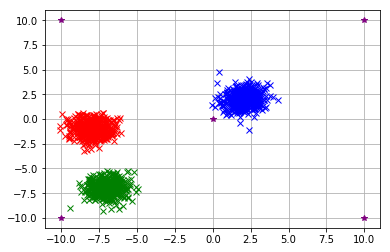

In [354]:
# Write code here:
x_new = np.zeros([5,2])
x_new[0,:] = [10,10]
x_new[1,:] = [-10,10]
x_new[2,:] = [-10,-10]
x_new[3,:] = [10,-10]
x_new[4,:] = [0,0]

plt.plot(x_new[:,0], x_new[:,1], '*', color='purple')
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'x', color='green')
plt.plot(x3, y3, 'x', color='red')
plt.grid(axis='both')
plt.show

n_new = len(x_new)
scores = np.zeros([5,3])

for i in range (n_new):
    scores[i,0] = np.transpose(beta1) @ x_new[i,:] + alpha[0,0]
    scores[i,1] = np.transpose(beta2) @ x_new[i,:] + alpha[1,0]
    scores[i,2] = np.transpose(beta3) @ x_new[i,:] + alpha[2,0]
        
print('New points: \n', x_new)
print('Blue - 1   Green - 2    Red - 3')
print('Scores: \n', scores)



Explanation of results:

The results make sense once you look at the 5 new points next to all the other gaussian points. The score array is showing all the h_lda values for all three classes, where the maximum value tells you what class that point belongs to.
Just by looking at the graph one can tell that points [10,10], [10,-10] and [0,0] are closest to the blue points. Paying attention to the score outputs you can see that the maximum value for these points corresponds to that of h1 which is the h_lda of the blue points.
The same holds true for the red and green points as it can be seen for [-10,10] which is closets to the red points and [-10,-10] which is next to the green ones.

**3) Logistic Regression**

In this problem, we will implement Logistic Regression using the built in capability (from sklearn).

Form a Logistic Regression classifer using the training data from Q$2$ and apply it to the training and testing sets from Q$2$. Obtain the CCRs for the training and testing sets; also, explain the resulting CCRs. 

In [355]:
from sklearn.linear_model import LogisticRegression

# Write code here:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
ccr_training = clf.score(x_train, y_train)
ccr_test = clf.score(x_test, y_test)
print('LR - Train CCR: ', ccr_training)
print('LR - Test CCR: ', ccr_test)

LR - Train CCR:  1.0
LR - Test CCR:  1.0


Explanation of results:

The amazing thing about python is that you can just call a function from a class and it will do everything for you. This is exactly the case here, where you just need one line of code to fit your model to x_train and y_train. Once it has been fitted, if you want to look at the score of that model with respect to the same training data the CCR should be 1.0 (since it is using the same points for training and testing). For the other CCR, if the model was trained correctly using the x_train and y_train values then using x_test and y_test values should also yield a CCR of 1.